# Test sur 20 images 


Flot maximal : 89551386.86673948
Flot maximal : 358984092.1170815
Flot maximal : 561653680.9536744
Flot maximal : 712741293.5966336
Flot maximal : 838329841.2522805


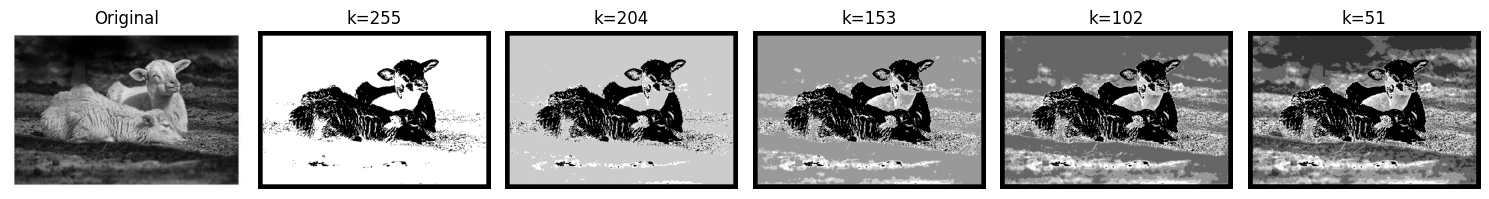

Flot maximal : 165474943.57721543
Flot maximal : 357631720.0811697
Flot maximal : 466264035.2092342
Flot maximal : 556471409.6131312
Flot maximal : 701074621.7707014


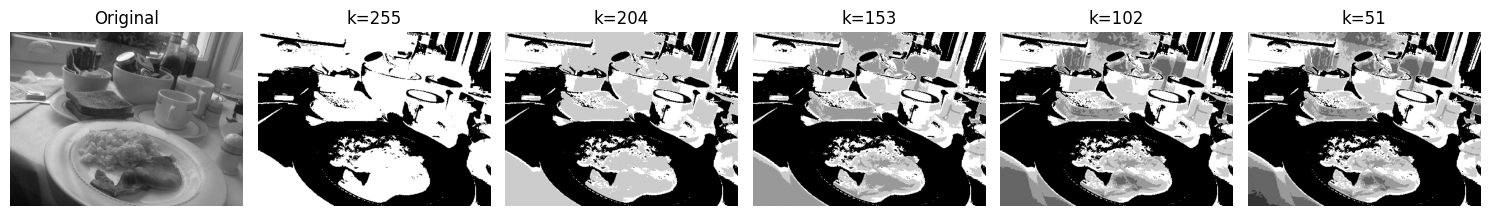

Flot maximal : 85042655.51799238
Flot maximal : 154441922.62522182
Flot maximal : 254958082.35592002
Flot maximal : 419659248.5328978
Flot maximal : 667728703.2459472


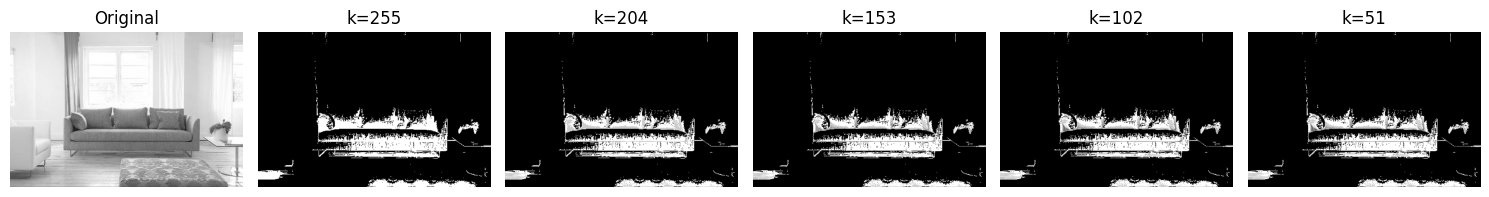

Flot maximal : 126876314.03020063
Flot maximal : 331568178.9373684
Flot maximal : 453981504.97634006
Flot maximal : 540304219.0544074
Flot maximal : 652352886.4270715


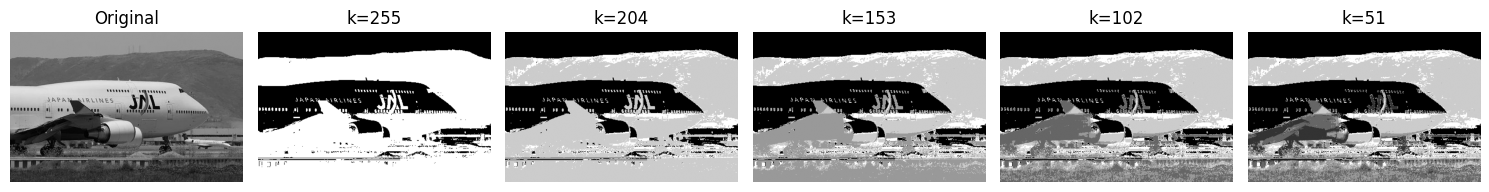

Flot maximal : 130836993.55431348
Flot maximal : 412116219.19184583
Flot maximal : 612766803.7124317
Flot maximal : 754339620.9431452
Flot maximal : 902202928.8041027


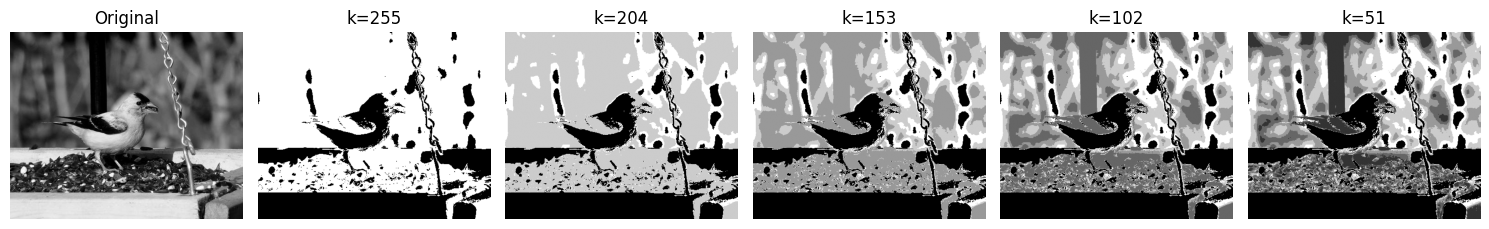

Flot maximal : 110661085.80901125
Flot maximal : 380184554.3506054
Flot maximal : 585832753.7597059
Flot maximal : 738510841.541146
Flot maximal : 865747142.1641294


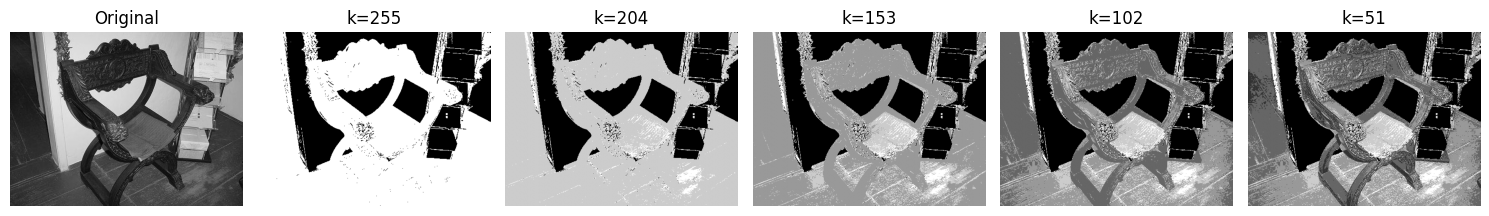

Flot maximal : 138384356.55719376
Flot maximal : 404185975.53204733
Flot maximal : 575429307.5350559
Flot maximal : 689421406.490857
Flot maximal : 819227310.954936


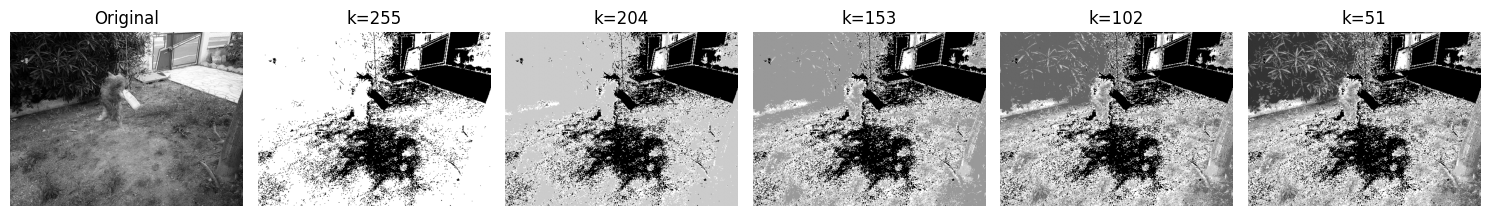

Flot maximal : 138699630.545667
Flot maximal : 316564521.12665534
Flot maximal : 421800020.2135478
Flot maximal : 516033521.5391197
Flot maximal : 644293108.1531379


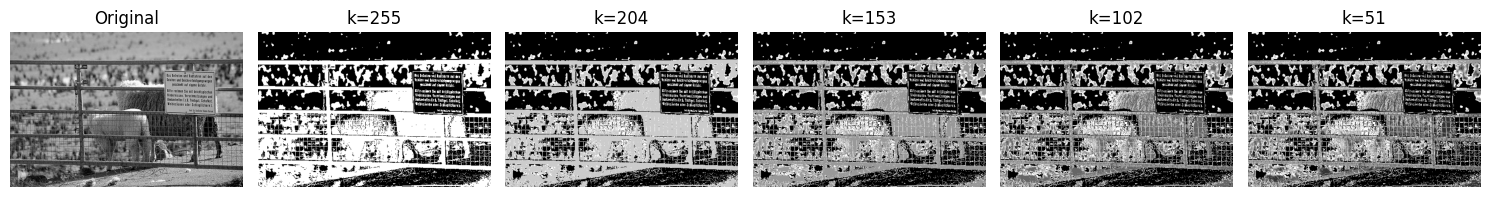

Flot maximal : 120892343.8641069
Flot maximal : 221939907.72073978
Flot maximal : 305664948.28387153
Flot maximal : 434844523.7388502
Flot maximal : 623013078.5810524


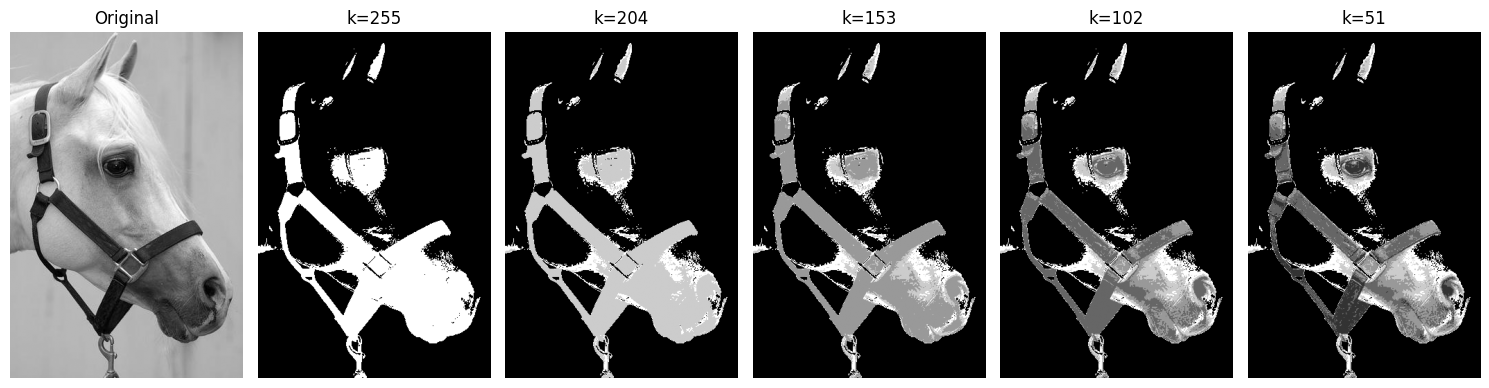

Flot maximal : 195623694.31533343
Flot maximal : 415396374.8179818
Flot maximal : 520813460.22330785
Flot maximal : 583267237.4925845
Flot maximal : 702938822.5286064


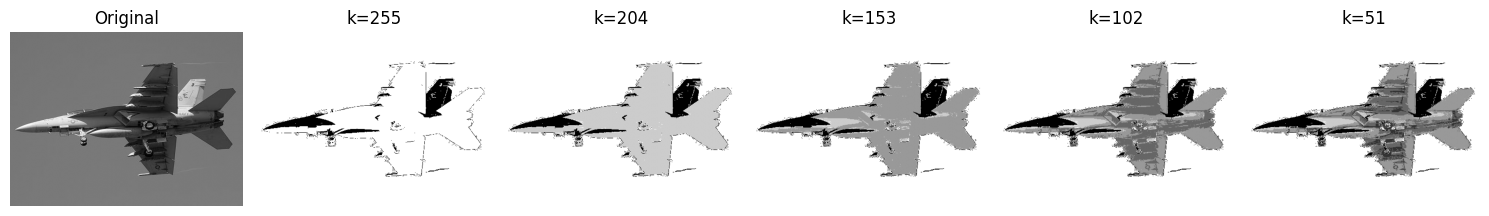

Flot maximal : 101019984.75636399
Flot maximal : 429962119.3440756
Flot maximal : 670049103.3048664
Flot maximal : 832111325.937539
Flot maximal : 946877090.8434917


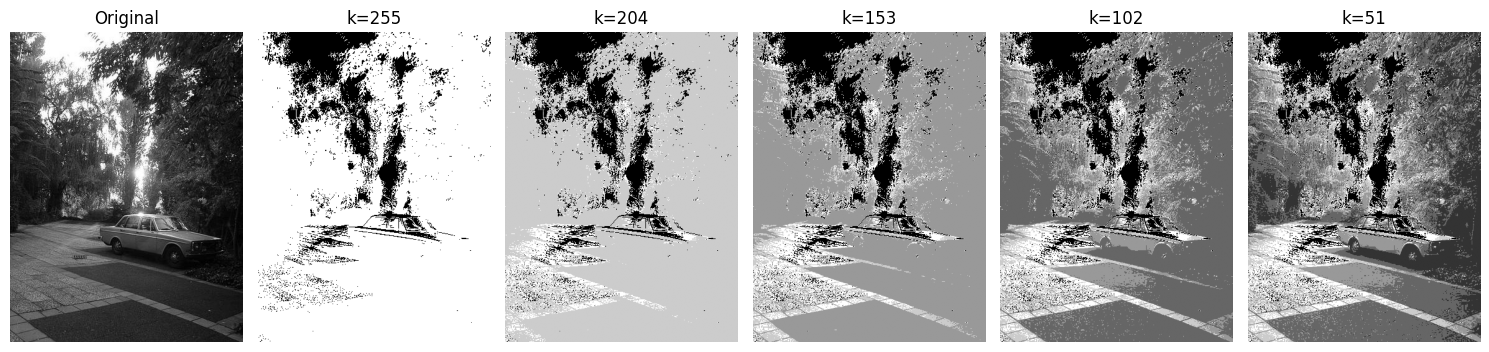

Flot maximal : 125465143.3969005
Flot maximal : 330534887.78191155
Flot maximal : 485484627.3950219
Flot maximal : 639520850.2192088
Flot maximal : 803458485.6999018


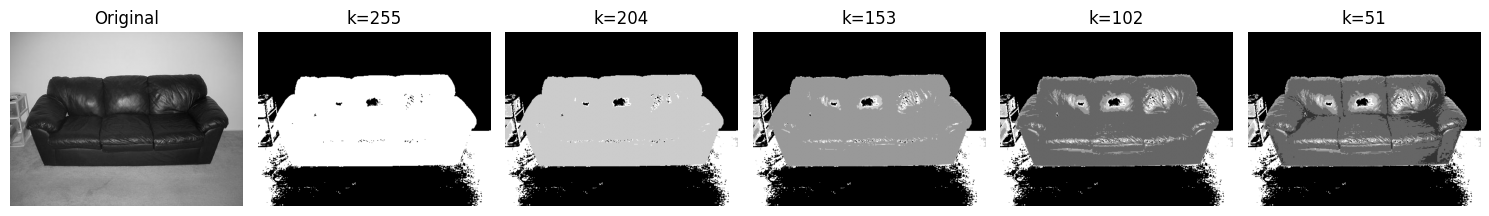

Flot maximal : 132545230.32332122
Flot maximal : 353817740.40567654
Flot maximal : 500561123.31418633
Flot maximal : 613621903.9536152
Flot maximal : 753831737.6880329


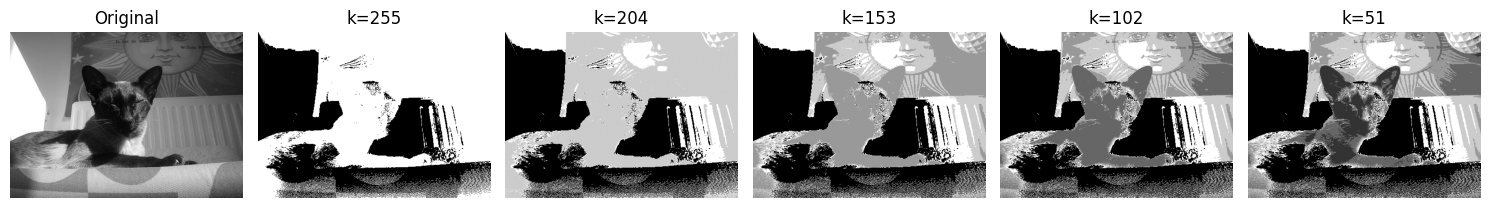

Flot maximal : 116980159.42239556
Flot maximal : 382777948.78175753
Flot maximal : 577240137.55715
Flot maximal : 727621172.1083902
Flot maximal : 855954507.1998634


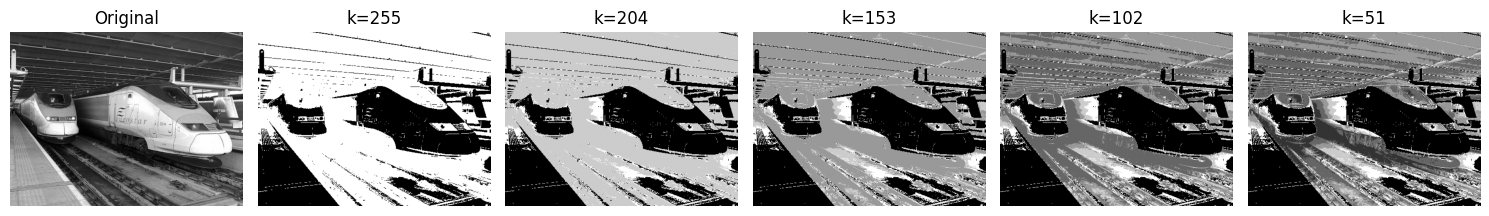

Flot maximal : 102316179.53260252
Flot maximal : 396994649.79040724
Flot maximal : 615962076.4574655
Flot maximal : 783849928.5522765
Flot maximal : 938414205.7074568


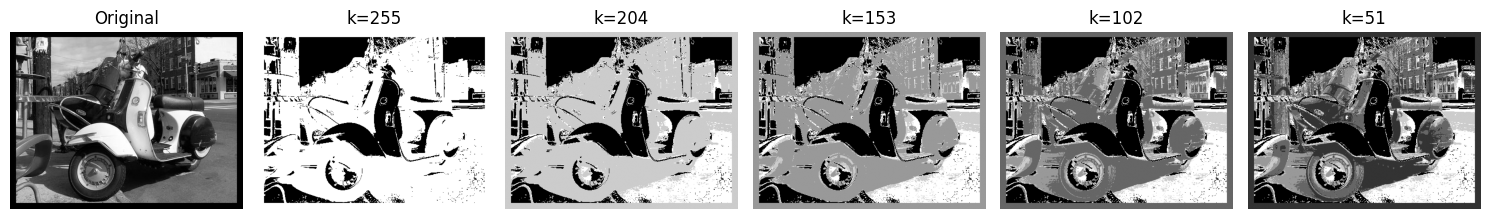

Flot maximal : 163758700.32460767
Flot maximal : 365109647.6053994
Flot maximal : 479451902.1871655
Flot maximal : 585902914.7540565
Flot maximal : 734687022.6198196


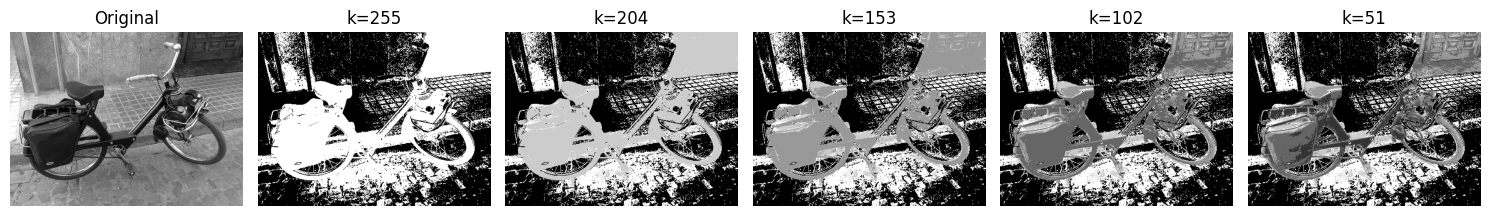

Flot maximal : 104960387.22896162
Flot maximal : 238167231.40655187
Flot maximal : 331642980.5294987
Flot maximal : 421220615.2593555
Flot maximal : 552268587.7476453


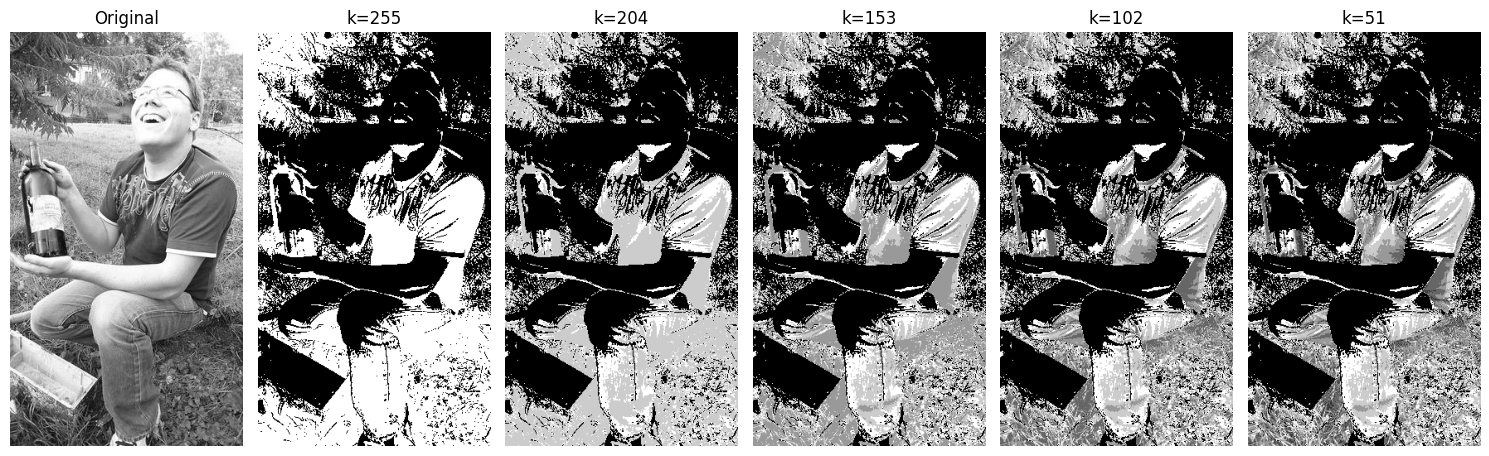

Flot maximal : 77287537.05085862
Flot maximal : 234215191.61735648
Flot maximal : 396122940.76081026
Flot maximal : 579108170.4701897
Flot maximal : 802878159.3431221


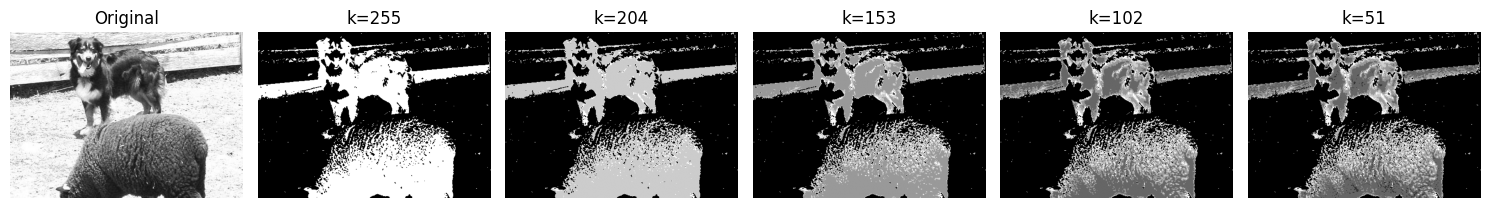

Flot maximal : 99974002.32774353
Flot maximal : 350599190.563988
Flot maximal : 533281188.51752365
Flot maximal : 671616417.7547319
Flot maximal : 790348283.5446981


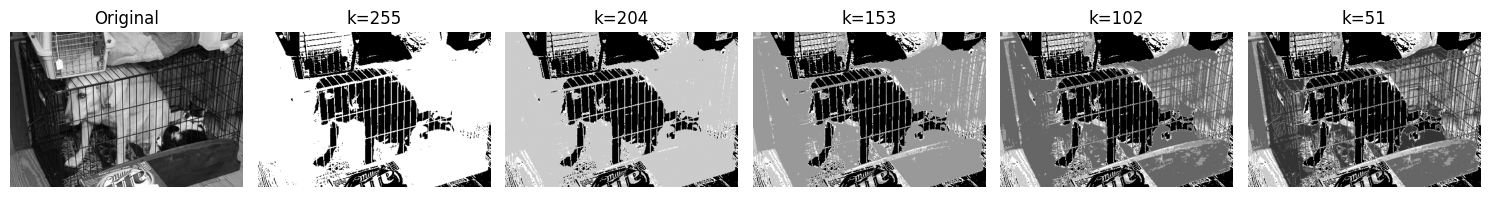

Flot maximal : 111081966.19845
Flot maximal : 426388479.89393383
Flot maximal : 648549850.4902893
Flot maximal : 805498989.4697566
Flot maximal : 932454041.8058405


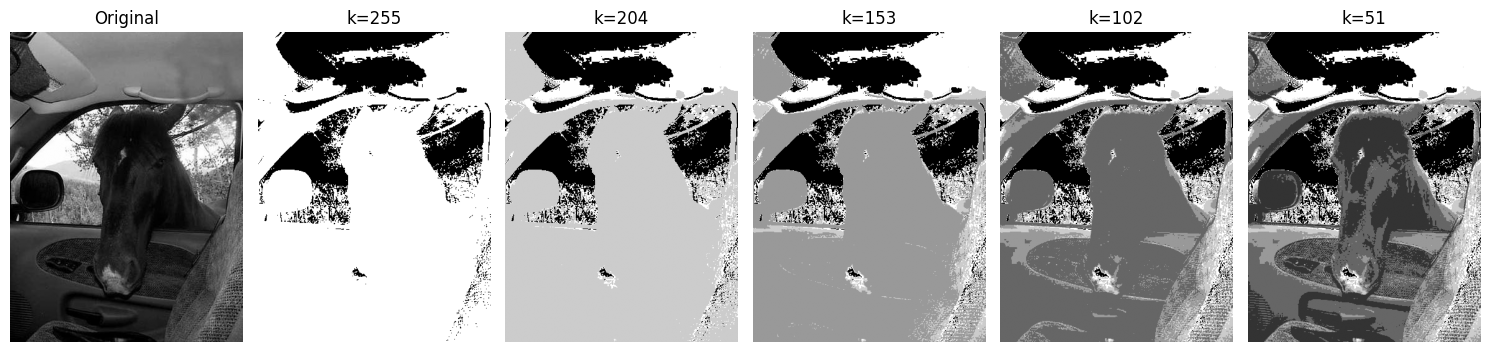

In [1]:
import os
import numpy as np
from PIL import Image
from image_to_graph_BW import AlphaExpansion
import numpy as np
import cv2
import matplotlib.pyplot as plt

def process_images(k, folder_path):
    """
    Applique un traitement sur chaque image du dossier en fonction des valeurs de k.
    
    :param k_values: Liste des valeurs de k.
    :param folder_path: Chemin du dossier contenant les images.
    """
    # Générer k valeurs uniformément réparties entre 0 et 255
    k_values = np.linspace(0, 255, num=k+1, dtype=int)[1:][::-1]


    # Vérifier si le dossier existe
    if not os.path.isdir(folder_path):
        raise ValueError(f"Le dossier spécifié '{folder_path}' n'existe pas.")
    
    # Récupérer la liste des fichiers image
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    for image_file in image_files:
        
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Initialisation de l'objet avec des poids personnalisés pour la source et le puit
        igc = AlphaExpansion(image_path, source_weight=10, sink_weight=10,sigma=15, source_label=255)
        # Construction du graphe (arêtes entre pixels)
        graph, nodes = igc.build_graph()
        fig, axes = plt.subplots(1, k+1, figsize=(15, 5))  # +1 pour l'image originale
        axes[0].imshow(image, cmap='gray')
        axes[0].set_title("Original")
        axes[0].axis('off')


        for i, k_val in enumerate(k_values):
            igc.source_label = k_val
            # Ajout des liens terminaux (source/puit)
            graph, nodes = igc.add_terminal_nodes()

            flow = igc.max_flow()

            segmentation = igc.segment_nodes()
            axes[i+1].imshow(segmentation, cmap='gray')
            axes[i+1].set_title(f"k={k_val}")
            axes[i+1].axis('off')
        plt.tight_layout()
        plt.show()



# Exemple d'utilisation
folder_path = "../images"
process_images(k = 5, folder_path=folder_path)
